In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [5]:
# Check whether are some missing value
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [6]:
# Delete rows with empty values
df = df.dropna(how = "any")

In [7]:
# Delete irrelevant columns
df = df.drop(columns = ["feature_0", "feature_1", "feature_2", "feature_3", "feature_4",
                        "feature_5", "feature_6", "feature_7", "feature_8", "feature_9"], axis = 1)

[Text(0.5, 0, 'Car Company'), Text(0, 0.5, 'Frequency of Company')]

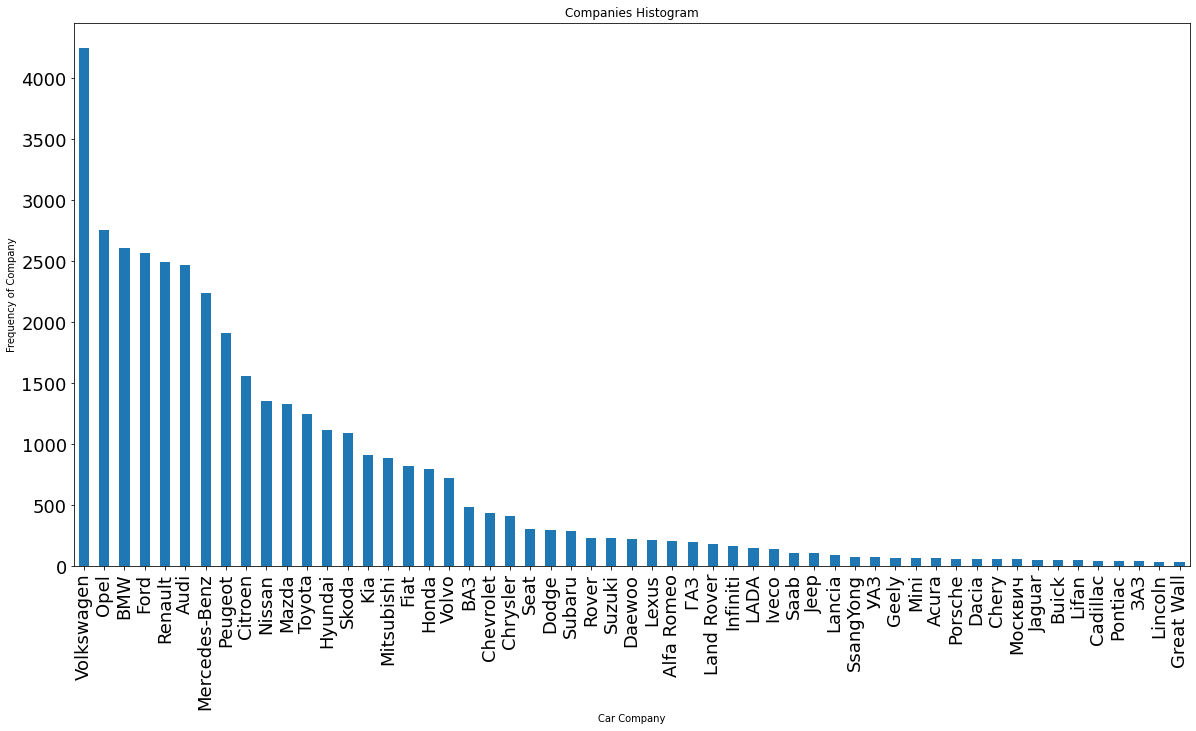

In [8]:
# Companies Histogram
plt = df.manufacturer_name.value_counts().plot(kind = "bar", figsize = (20,10), 
                                               title = "Companies Histogram", 
                                               fontsize = 18)
plt.set(xlabel = "Car Company", ylabel = "Frequency of Company")

[Text(0.5, 0, 'Body Type'), Text(0, 0.5, 'Frequency of Body Type')]

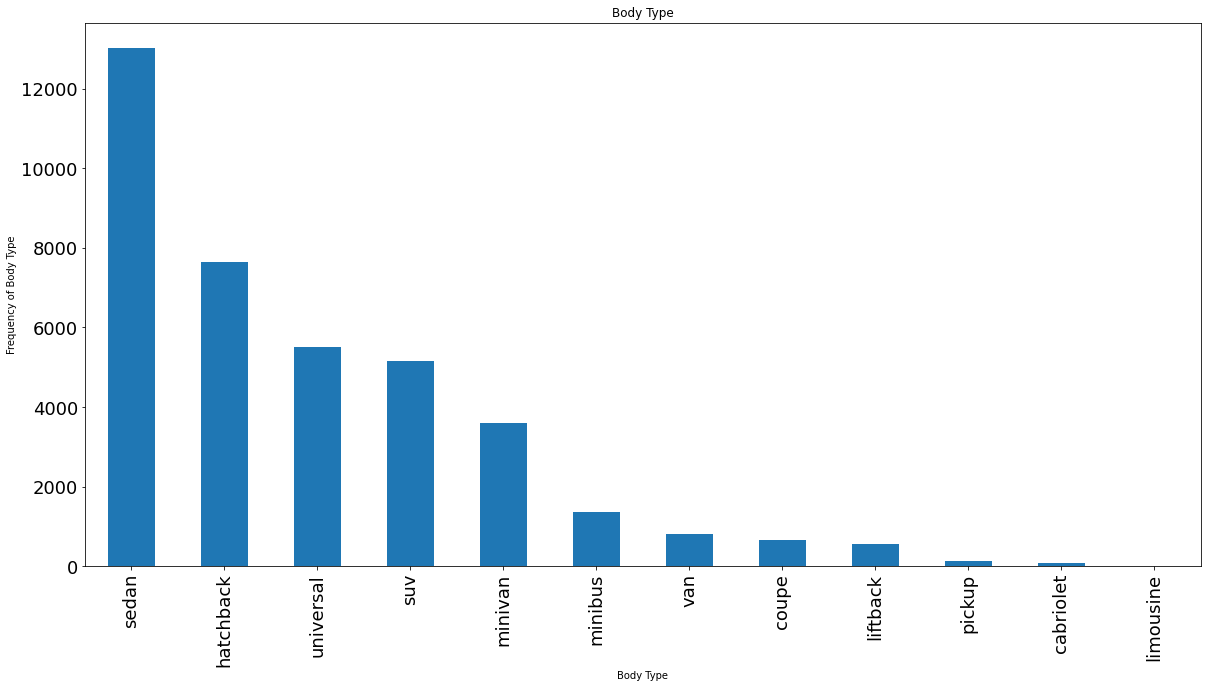

In [9]:
# Body Type Histogram
plt = df.body_type.value_counts().plot(kind = "bar", figsize = (20,10), title = "Body Type", fontsize = 18)
plt.set(xlabel = "Body Type", ylabel = "Frequency of Body Type")

[Text(0.5, 0, 'Engine Type'), Text(0, 0.5, 'Frequency of Engine Type')]

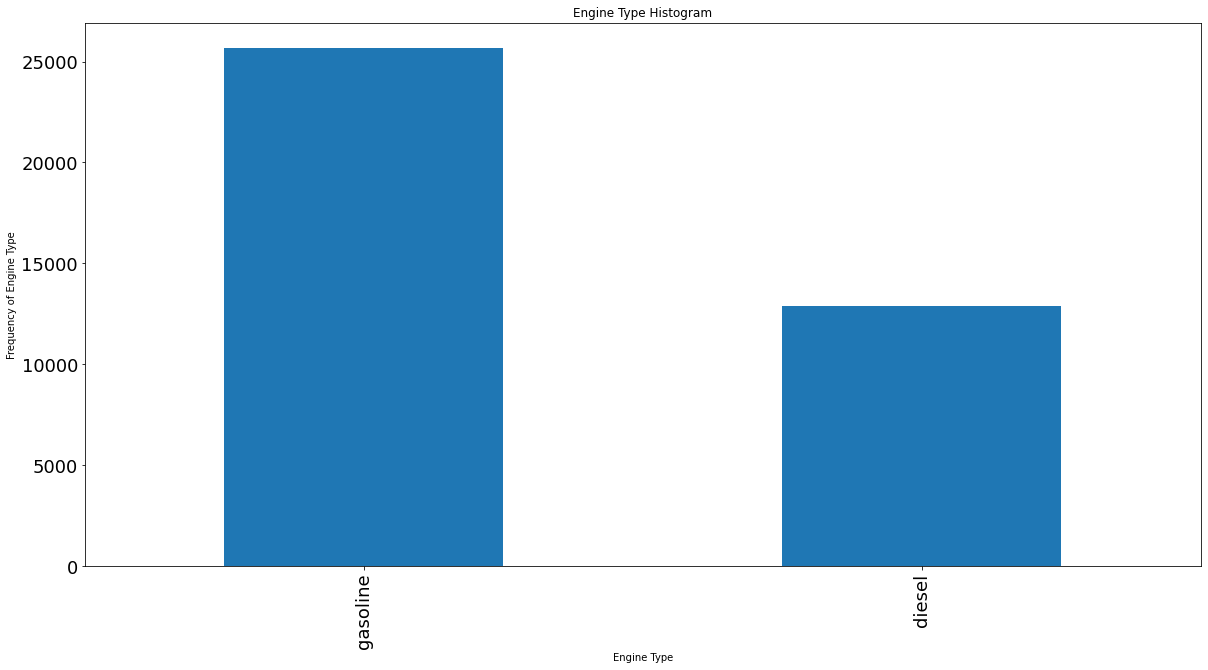

In [10]:
# Engine Type Histogram
plt = df.engine_type.value_counts().plot(kind = "bar", figsize = (20,10), 
                                         title = "Engine Type Histogram", fontsize = 18)
plt.set(xlabel = "Engine Type", ylabel = "Frequency of Engine Type")

In [11]:
# Digitized categorical variables
encoders = {}
to_encode_columns = []
for column in df.columns:
    if df[column].dtype == "object" or df[column].dtype == "bool":
        to_encode_columns.append(column)
for column in to_encode_columns:
    encoder = LabelEncoder()
    col = df[column]
    encoded_col = encoder.fit_transform(col)
    df[column] = encoded_col
    encoders[column] = encoder

In [12]:
# View Correlations
df.corr()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
manufacturer_name,1.000000,0.216418,0.146214,0.050061,-0.048007,0.000777,-0.028508,-0.027704,-0.034166,-0.198033,-0.053337,0.089543,-0.040831,-0.056542,-0.028763,-0.034278,0.008158,-0.025495,-0.012103,-0.012176
model_name,0.216418,1.000000,-0.047009,0.033049,-0.024228,0.163829,-0.120546,0.011594,-0.120931,0.073432,0.022452,0.061610,-0.022800,-0.201231,0.157436,-0.000562,0.025443,0.039485,0.012340,0.006139
transmission,0.146214,-0.047009,1.000000,0.099128,0.229648,-0.385235,-0.144661,-0.018669,-0.134511,-0.428596,-0.148584,-0.065499,0.005943,0.229088,-0.476201,-0.027045,-0.084227,-0.196863,-0.044324,-0.031937
color,0.050061,0.033049,0.099128,1.000000,0.024233,-0.040747,-0.043006,0.004910,-0.042474,-0.099253,-0.035392,-0.010412,0.004483,0.060723,-0.067657,-0.008914,-0.012109,-0.045639,-0.001217,0.002253
odometer_value,-0.048007,-0.024228,0.229648,0.024233,1.000000,-0.488448,-0.260477,0.057736,-0.246308,0.105704,0.041074,-0.189577,0.081820,0.196735,-0.420965,0.042370,-0.092736,-0.143564,-0.020976,-0.000508
year_produced,0.000777,0.163829,-0.385235,-0.040747,-0.488448,1.000000,0.005034,-0.074637,-0.019512,0.005059,0.061922,0.209322,-0.038544,-0.285900,0.705439,-0.057967,0.130975,0.258064,0.007963,-0.016916
engine_fuel,-0.028508,-0.120546,-0.144661,-0.043006,-0.260477,0.005034,1.000000,-0.061368,0.967317,-0.107951,-0.146427,0.050541,-0.042037,-0.050314,-0.062996,-0.005130,0.050895,-0.005483,-0.002908,-0.004113
engine_has_gas,-0.027704,0.011594,-0.018669,0.004910,0.057736,-0.074637,-0.061368,1.000000,0.134866,0.084579,0.035726,-0.020672,0.010352,-0.015042,-0.062482,0.018654,-0.038694,-0.032076,0.000056,0.018252
engine_type,-0.034166,-0.120931,-0.134511,-0.042474,-0.246308,-0.019512,0.967317,0.134866,1.000000,-0.089979,-0.138010,0.048741,-0.041753,-0.053256,-0.085328,0.000599,0.041472,-0.014785,-0.003492,-0.001456
engine_capacity,-0.198033,0.073432,-0.428596,-0.099253,0.105704,0.005059,-0.107951,0.084579,-0.089979,1.000000,0.268866,-0.054583,0.046316,-0.144262,0.296597,0.081636,0.006937,0.106691,0.079152,0.080081
